In [26]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# === Setup ===
ROOT_DIR = r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures'
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))

os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    from help_functions import dict_to_horizontal_df, get_df_from_file
    import help_functions
    import visualize
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
    )
    import plot
except ModuleNotFoundError as e:
    print(f"Module import failed: {e}")

# === Config ===
pd.set_option('display.max_columns', None)

# === Load molecular data ===
feather_path = r'C:\Users\edens\Documents\GitHub\possible_dataset_info\Lutz\Reunmbered_Feather_Files\test'
mols = Molecules(feather_path)


[Warning] Pd group filtering failed: 'pd_idx'
Molecules Loaded: ['FL_lig_4_str_optimized.feather'] Failed Molecules: []


In [17]:
df=dict_to_horizontal_df(mols.get_dipole_dict([[1, 2, 3], [2,3,4],[]],visualize_bool=True))

  atom       x       y       z
0    O  0.0000  3.8346 -0.0000
1    C  1.1729  3.2128  0.0000
2    C  2.3107  3.8127 -0.4268
3    C  2.2775  5.1723 -0.8945
4    N  1.2294  5.9078 -0.9781 [0, 1, 2]
🔥 dipole vector: array([ 1.08808862,  0.57691538, -0.0295224 ]) (scaled by 5)


  atom       x       y       z
0    O  0.0000  0.0000  0.0000
1    C  0.0000  1.3275 -0.0000
2    C  1.1454  2.0518 -0.0000
3    C  2.4200  1.3857 -0.0078
4    N  2.5987  0.1152  0.0105 [1, 2, 3]
🔥 dipole vector: array([ 0.094177  ,  1.22797932, -0.02893512]) (scaled by 5)


Error in get_dipole_gaussian_df_single: list index out of range
🔥 dipole vector: array([ 0.6906,  0.8112, -0.6186]) (scaled by 5)


In [3]:
df

,dipole_x_1-2-3,dipole_y_1-2-3,dipole_z_1-2-3,total_dipole_1-2-3,dipole_x_2-3-4,dipole_y_2-3-4,dipole_z_2-3-4,total_dipole_2-3-4,dipole_x_base_symmetry,dipole_y_base_symmetry,dipole_z_base_symmetry,total_dipole_symmetry_base
FL_lig_4_str_optimized,1.088089,0.576915,-0.029522,1.2319,0.094177,1.227979,-0.028935,1.2319,0.6906,0.8112,-0.6186,1.2319


In [2]:
import json 
os.chdir(r'C:\Users\edens\Documents\GitHub\MolAlign\MolAlign\scripts\molecules\results')
renumbering_dict_list = json.load(open('renumbering_dict_list.json'))
print(renumbering_dict_list)

[{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 10, '20': 11, '23': 14, '24': 15, '25': 16, '26': 17, '27': 19, '28': 18, '29': 20}, {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 10, '7': 6, '19': 8, '20': 7, '21': 11, '22': 13, '23': 12, '24': 14, '25': 15, '26': 16, '27': 18, '28': 17, '29': 19, '30': 20}, {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 10, '17': 11, '20': 14, '21': 15, '22': 16, '23': 18, '24': 19, '25': 17, '26': 20}, {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '13': 10, '14': 11, '17': 14, '18': 15, '19': 16, '20': 17, '21': 18, '22': 19, '23': 20}, {'3': 3, '4': 4, '5': 5, '6': 10, '7': 6, '17': 11, '20': 14}, {'0': 0, '1': 1, '3': 3, '4': 4, '5': 5, '6': 6, '16': 10, '17': 11, '20': 14, '21': 16, '22': 19, '23': 18, '24': 17, '25': 20}, {'0': 0, '1': 1, '3': 3, '4': 4, '5': 5, '6': 10, '7': 6, '17': 11, '20': 14, '21': 16, '34': 20}, {'0': 0, '1': 1, '3': 3, '4': 4, '5': 5, '6': 10, '7': 6, '17': 11, '20': 14, '21': 16, '38': 20

In [ ]:
methods=[method for method in dir(mols) if not method.startswith('_')]
print(methods)

In [ ]:
answers_dict={
    "Ring Vibration atoms - by order -> Pick primary atom and para to it: \n example: 13,17": [8],
    "Stretch Threshold": [1400],
    "Stretching Vibration atoms- enter bonded atom pairs: \n example: 1,2 4,5": [1,21],
    "Bend Threshold": [1600],
    "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7":[13,14],
    "Center_Atoms Dipole": [],
    "Dipole atoms - indices for coordination transformation: \n example: 4,5,6 - origin, y-axis, new xy plane": [[1, 2, 3], [2,3,4],[]],
    "Sub-Atoms NPA": [],
    "NPA manipulation atoms - Insert atoms to show NPA: \n example: 1,2,4": [[1, 2, 3], [4,5,6]],
    "charges values - Insert atoms to show charge: \n example: 1,2,3,4": [1,2,3,4,5,6,21,17],
    "charge_diff - Insert atoms to show charge difference: \n example: 1,2 3,4": [[15,5], [1,5]],
    "Sterimol atoms - Primary axis along: \n example: 7,8": [[6,7], [7,6], [17,2], [2,17]],
    "Bond_length - Atom pairs to calculate difference: \n example: 1,2 4,5": [[1,2], [5,6]],
    "Bond_Angle - Insert a list of atom triads/quartets for which you wish to have angles/dihedrals: \n example: 1,3,4 5,6,7,4": [5,4,3,2]
}



df=mols.get_molecules_comp_set_app(entry_widgets=answers_dict,answers_list=None)

Debug: Found 1 cycles in the graph: [[5, 6, 12, 15, 4]]
No benzene ring found.
Debug: Found 0 benzene rings
     0   1
0    1   2
1    1  21
2    2   3
3    2  17
4    3   4
5    3  16
6    4   5
7    4  15
8    5   6
9    6   7
10   6  11
11   6  12
12   7   8
13   7   9
14   7  10
15   9  22
16   9  26
17   9  30
18  12  13
19  12  14
20  12  15
21  17  18
22  17  19
23  17  20
24  22  23
25  22  24
26  22  25
27  26  27
28  26  28
29  26  29
[ERROR] Error in get_ring_vibrations (get_benzene_ring_indices): cannot unpack non-iterable NoneType object
Error in <unknown> at line 724:
Debug: Found 2 cycles in the graph: [[5, 6, 12, 15, 4], [22, 23, 24, 25, 26, 10]]
No benzene ring found.
Debug: Found 0 benzene rings
     0   1
0    1   2
1    1  21
2    2   3
3    2  17
4    3   4
5    3  16
6    4   5
7    4  15
8    5   6
9    6   7
10   6  11
11   6  12
12   7   8
13   7   9
14   7  10
15  10  22
16  10  26
17  12  13
18  12  14
19  12  15
20  17  18
21  17  19
22  17  20
23  22  23
24

Traceback (most recent call last):
  File "C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M2_data_extractor\data_extractor.py", line 724, in get_ring_vibrations
    z, x, c, v, b, n = get_benzene_ring_indices(self.bonds_df, ring_atom_indices)
TypeError: cannot unpack non-iterable NoneType object
Traceback (most recent call last):
  File "C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M2_data_extractor\data_extractor.py", line 724, in get_ring_vibrations
    z, x, c, v, b, n = get_benzene_ring_indices(self.bonds_df, ring_atom_indices)
TypeError: cannot unpack non-iterable NoneType object
Traceback (most recent call last):
  File "C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M2_data_extractor\data_extractor.py", line 724, in get_ring_vibrations
    z, x, c, v, b, n = get_benzene_ring_indices(self.bonds_df, ring_atom_indices)
TypeError: cannot unpack non-iterable NoneType object
Traceback (most recent call last):
  File "C:\Users\edens\Documents\GitHub\LabCode\MolFeatures

Error: FL_lig_10_str_optimized Dipole could not be processed: list index out of range
Error in get_dipole_dict at line 539:
Error: FL_lig_11_str_optimized Dipole could not be processed: list index out of range
Error in get_dipole_dict at line 539:
Error: FL_lig_12_str_optimized Dipole could not be processed: list index out of range
Error in get_dipole_dict at line 539:
Error: FL_lig_13_str_target Dipole could not be processed: list index out of range
Error in get_dipole_dict at line 539:
Error: FL_lig_14_str_optimized Dipole could not be processed: list index out of range
Error in get_dipole_dict at line 539:
Error: FL_lig_15_str_optimized Dipole could not be processed: list index out of range
Error in get_dipole_dict at line 539:
Error: FL_lig_16_str_optimized Dipole could not be processed: list index out of range
Error in get_dipole_dict at line 539:
Error: FL_lig_17_str_optimized Dipole could not be processed: list index out of range
Error in get_dipole_dict at line 539:
Error: FL_l

Traceback (most recent call last):
  File "C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M2_data_extractor\data_extractor.py", line 970, in get_dipole_dict
    dipole_dict[molecule.molecule_name]=molecule.get_dipole_gaussian_df(atom_indices,origin=origin,visualize_bool=visualize_bool)
  File "C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M2_data_extractor\data_extractor.py", line 558, in get_dipole_gaussian_df
    dipole_list = [self.get_dipole_gaussian_df_single(atoms,origin=origin,visualize_bool=visualize_bool) for atoms in base_atoms_indices]
  File "C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M2_data_extractor\data_extractor.py", line 558, in <listcomp>
    dipole_list = [self.get_dipole_gaussian_df_single(atoms,origin=origin,visualize_bool=visualize_bool) for atoms in base_atoms_indices]
  File "C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M2_data_extractor\data_extractor.py", line 539, in get_dipole_gaussian_df_single
    dipole_df = dipole_df.rename(in

In [14]:
os.chdir(r'C:\Users\edens\Documents\GitHub\Robert')
df.to_csv('Lutz_new_features.csv', index=True)

Database already exists at: results_Lutz_new_features.db
Table 'regression_results' has been ensured to exist.
linear model selected

--- Correlation Report ---
Features with correlation above 0.8:
['nbo_atom_6', 'dipole_x_2-3-4', 'nbo_atom_2', 's_C2_L_FL', 'total_dipole_NPA_4-5-6', 'Frequency_Stretch_1_21', 'hirshfeld_atom_1', 'nbo_C6_CMC', 'hirshfeld_diff_15-5', 'cm5_diff_15-5', 'hirshfeld_diff_1-5', 'hirshfeld_atom_17', 'total_dipole_1-2-3', 'dihedral_[5, 4, 3, 2]', 'cm5_atom_21', 'nbo_diff_15-5', 'loc_B5_6-7', 'B5_7-6', 'dip_y_NPA_1-2-3', 'hirshfeld_atom_5', 'dipole_z_1-2-3', 'cm5_atom_1', 'L_7-6', 'loc_B5_2-17', 'dip_y_NPA_4-5-6', 'dipole_z_2-3-4', 'nbo_atom_21', 'nbo_atom_17', 'B1_6-7', 'nbo_diff_1-5', 'cm5_atom_6', 'total_dipole_NPA_1-2-3', 'total_dipole_2-3-4', 'hirshfeld_atom_4', 'hirshfeld_atom_3', 'B5_17-2', 'dip_x_NPA_4-5-6', 'cm5_atom_4', 'dipole_y_2-3-4', 'cm5_atom_17', 'nbo_atom_5', 'IE (Ha)', 'dipole_x_1-2-3', 'cm5_atom_3', 'L_6-7', 'nbo_atom_3', 'B1_B5_angle_7-6', 'nbo

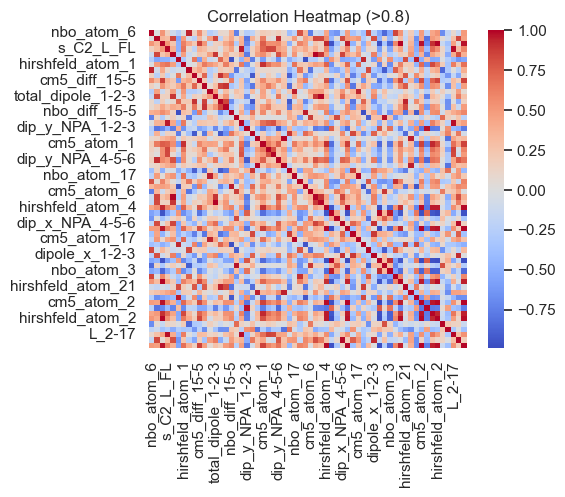


Correlated features were not dropped.



In [27]:
csv_path=r'C:\Users\edens\Documents\GitHub\Robert\Lutz_new_features.csv'

# csv_path=r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\added_features_try34.csv'

csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
# ['LS2008','LS1643']
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
df=pd.read_csv(csv_path, index_col=0)

# df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
leave_out = [
    "LS1621", "LS1622", "LS1630", "LS1641", "LS1642", "LS1643",
    "LS1661", "LS1663", "LS1714", "LS1715", "LS1716", "LS1717",
    "LS1721", "LS1723", "LS1726", "LS1734", "LS1736",
    "LS2000", "LS2001", "LS2002", "LS2003", "LS2006", "LS2007", "LS2008"
]

# pick 4 random samples to leave out
# leave_out = (np.random.choice(df_drop.index-1, size=5, replace=False)-1).tolist()
# print(f"idx: {df.index}")
leave_out=[3,22,16,15,12] # 
leave_out=[1,20,14,13,10] # 
Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=leave_out, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)

features=['IE (Ha)', 'dipole_x_1-2-3','hirshfeld_atom_1','bond_length_5-6']
# features_2=['IE (Ha)', 'dip_x_NPA_4-5-6','hirshfeld_atom_1','bond_length_5-6']
# features_origin =['IE (Ha)','nbo_C2_CMC','nbo_C6_CMC','s_C2_L_FL']

# plot.generate_and_display_q2_scatter_plot(Regression_model,features_origin)


# plot.generate_and_display_q2_scatter_plot(Regression_model,features)


# plot.generate_and_display_q2_scatter_plot(Regression_model,features_2)
feat=['IE (Ha)', 'B1_2-17','nbo_atom_4','loc_B5_2-17']
# features2=['IE (Ha)', 'dipole_x_base_symmetry','hirshfeld_atom_1','bond_length_5-6']
# plot.generate_and_display_q2_scatter_plot(Regression_model,features)
# plot.generate_and_display_q2_scatter_plot(Regression_model,feat)


Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Using single train/test split with test size 0.1 and random state 42
Index 0: Actual = -1.000, Predicted = -0.857, % Error = -14.35%
Index 1: Actual = 0.190, Predicted = -0.135, % Error = -171.27%
Index 2: Actual = -0.570, Predicted = -0.356, % Error = -37.54%
Index 3: Actual = -0.680, Predicted = -0.440, % Error = -35.31%
Index 4: Actual = -1.130, Predicted = -0.945, % Error = -16.41%
Index 5: Actual = -0.650, Predicted = -0.727, % Error = 11.90%
Index 6: Actual = -0.240, Predicted = -0.502, % Error = 109.34%
Index 7: Actual = -1.740, Predicted = -1.951, % Error = 12.10%
Index 8: Actual = -1.180, Predicted = -1.031, % Error = -12.63%
Index 9: Actual = -1.530, Predicted = -1.711, % Error = 11.80%
Index 10: Actual = -1.740, Predicted = -1.545, % Error = -11.18%
Index 11: Actual = -0.590, Predicted = -0.887, % Error = 50.35%
Index 12: Actual = -1.050, Predicted = -0.932, % Error = -11.21%
Index

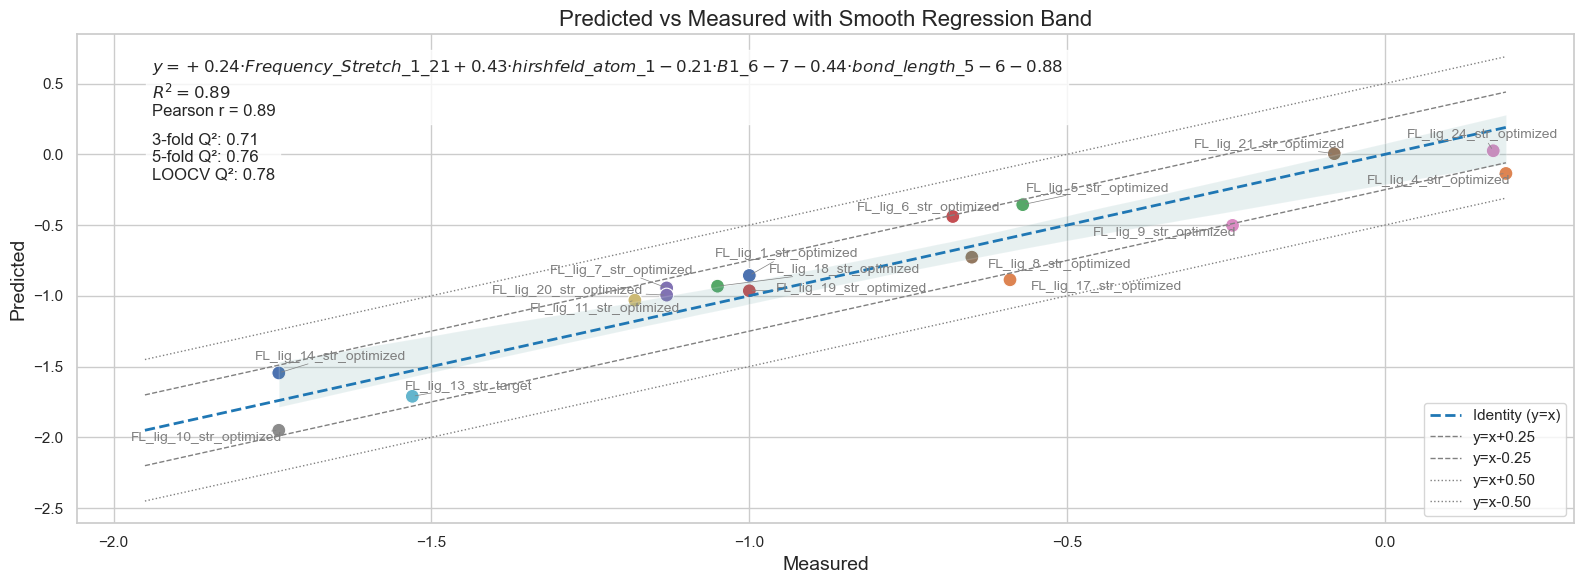

In [20]:
features_sterimol =['Frequency_Stretch_1_21','hirshfeld_atom_1','B1_6-7','bond_length_5-6']

plot.generate_and_display_q2_scatter_plot(Regression_model,features_sterimol)

TreeExplainer failed: The passed model is not callable and cannot be analyzed directly with the given masker! Model: <modeling.LinearRegressionModel object at 0x00000223C6894CD0>. Falling back to KernelExplainer.


  0%|          | 0/17 [00:00<?, ?it/s]

Error creating explainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: <modeling.LinearRegressionModel object at 0x00000223C6894CD0>


  0%|          | 0/17 [00:00<?, ?it/s]

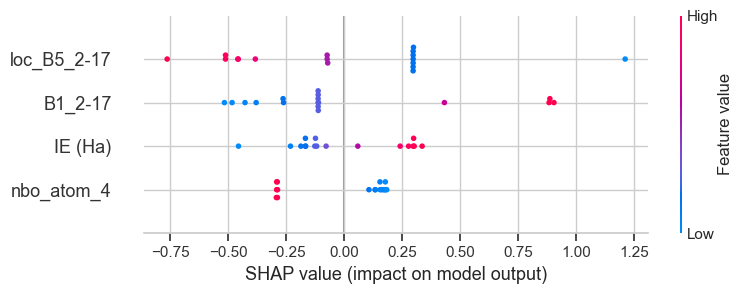

Error creating explainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: <modeling.LinearRegressionModel object at 0x00000223C6894CD0>


  0%|          | 0/17 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

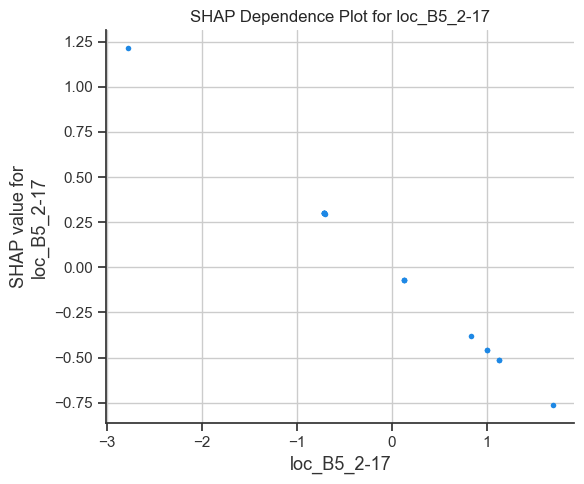

Error creating explainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: <modeling.LinearRegressionModel object at 0x00000223C6894CD0>


  0%|          | 0/17 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

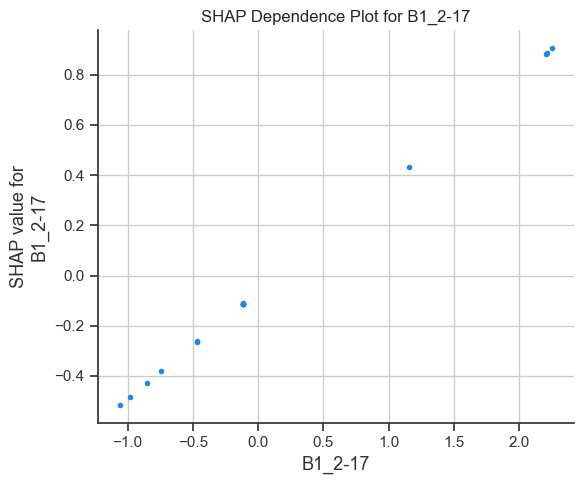

Error creating explainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: <modeling.LinearRegressionModel object at 0x00000223C6894CD0>


  0%|          | 0/17 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

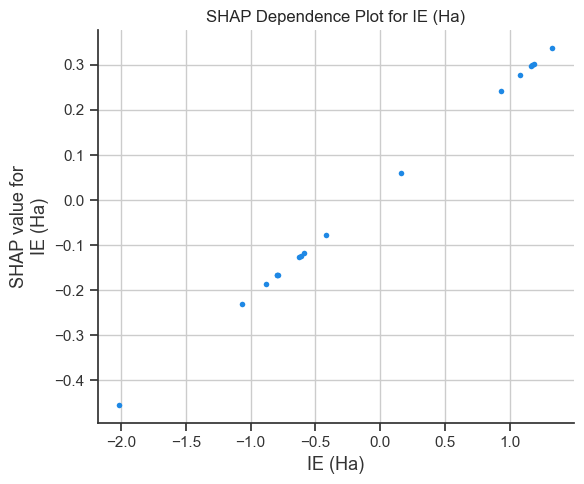

Error creating explainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: <modeling.LinearRegressionModel object at 0x00000223C6894CD0>


  0%|          | 0/17 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

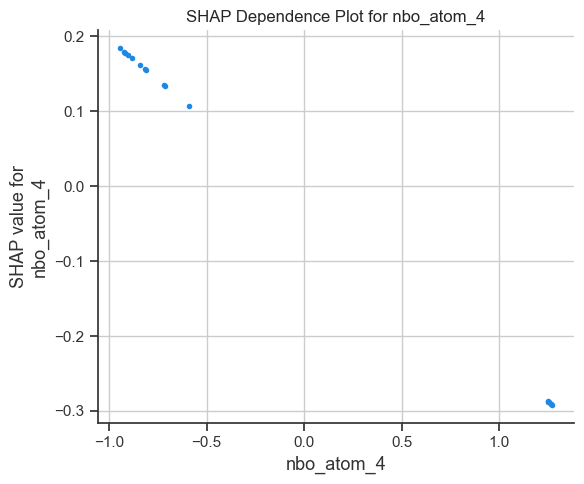

In [23]:
features_df1 = Regression_model.features_df[features]
features_df2 = Regression_model.features_df[features_sterimol]
features_df3 = Regression_model.features_df[feat]

res1=plot.analyze_shap_values(Regression_model, features_df3)

In [25]:
mols.visualize_molecules([0])

🔥 dipole vector: array([ 0.6906,  0.8112, -0.6186]) (scaled by 5)


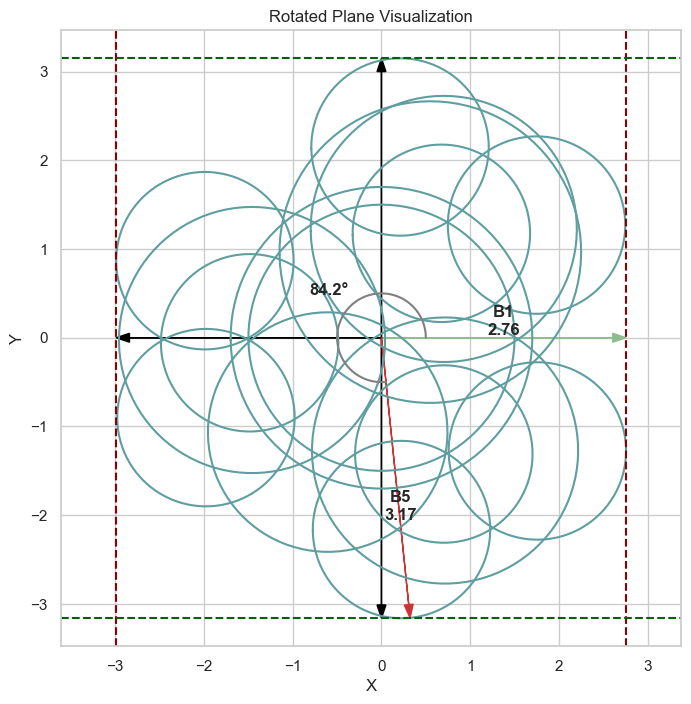

B1 B5 Plane


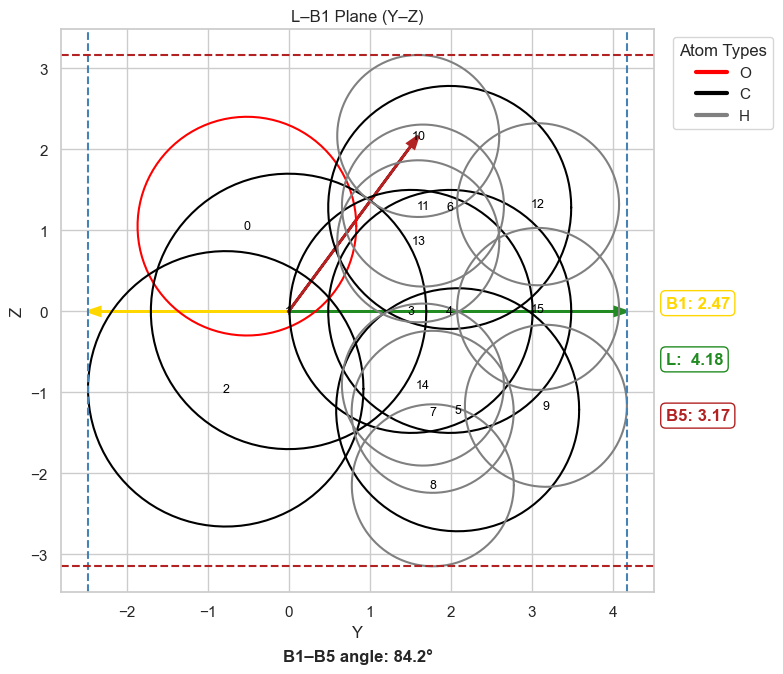

L B5 Plane


{'FL_lig_4_str_optimized':           B1      B5       L  loc_B5  B1_B5_angle
 2-17  2.7571  3.1737  4.1766  1.6006      84.1678}

In [24]:
mols.get_sterimol_dict([2,17], visualize_bool=True)

In [28]:
target_df = Regression_model.target_vector
target_df = plot.ddG_to_ee_and_class(target_df)
print(target_df)

    ΔΔG (kcal/mol)  Predicted ee (%)  Binary Class
0            -1.00         68.787101          True
1             0.19        -15.898153         False
2            -0.57         44.706406          True
3            -0.68         51.818426          True
4            -1.13         74.141337          True
5            -0.65         49.942306          True
6            -0.24         19.981207         False
7            -1.74         89.927024          True
8            -1.18         75.982714          True
9            -1.53         85.943321          True
10           -1.74         89.927024          True
11           -0.59         46.046637          True
12           -1.05         70.946137          True
13           -1.00         68.787101          True
14           -1.13         74.141337          True
15           -0.08          6.740988         False
16            0.17        -14.248736         False


In [ ]:
plot.univariate_threshold_analysis(Regression_model, features_sterimol, target_df['Binary Class'], threshold=35)